In [6]:
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
#import mnist
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pandas as pd

# Task: Recognize the handwriting of digits (0-9)

Providing with a training dataset with a series of digits in handwriting, training a model to predict handwriting digits. Only greyscale digit is used.  The shape of each image in training set is : (60000, 28, 28), including 60000 samples for training with 28*28 pixel size. The dateset is provided through the mist library.

In [7]:
# load the data 
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# show the image data

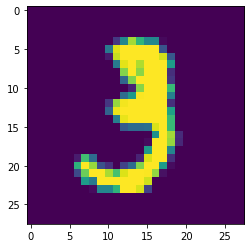

In [10]:
%matplotlib inline 
index=10
plt.imshow(x_train[index])

# data preprocessing

In [11]:
# normalize data by 255, which is the color range. And scale them into the range of [-0.5,0.5]
train_images=x_train/255-0.5
test_images=x_test/255-0.5

In [12]:
# flatten data into a shape of (num_samples,num_features)
# noted, the input data shape in keras is go back to the convention, different with the utilize of nn theoretical derivation.
train_images=train_images.reshape((-1,28*28)) 
test_images=test_images.reshape((-1,28*28))
print (train_images.shape)
print (test_images.shape)

(60000, 784)
(10000, 784)


# Build the NN model with keras framework

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).


In [14]:
# build the  NN model with keras framework. 
# it is much simpler than the utilize of tensorflow, which provids a support and the backend of keras. 
# the first thing is that we have to explicitly tell the keras what the input_shape look like. 
# use softmax to convert the values into a probability distribution.

model=Sequential([Dense(64,activation='relu',input_shape=(784,)),
                 Dense(64,activation='relu'),
                 Dense(10,activation='softmax'),])

# Comile the model

Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:

# The optimizer. 
We’ll stick with a pretty good default: the Adam gradient-based optimizer. Keras has many other optimizers you can look into as well.

# The loss function. 
Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes), so we’ll use the latter. See all Keras losses.

# A list of metrics. 
Since this is a classification problem, we’ll just have Keras report on the accuracy metric.

In [16]:
# Compile the model.
# we can see that, it is much simpler than the use of tensorflow
model.compile (optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training the Model

Training a model in Keras literally consists only of calling fit() and specifying some parameters. 
There are a lot of possible parameters, but we’ll only manually supply a few:

The training data (images and labels), commonly known as X and Y, respectively.
The number of epochs (iterations over the entire dataset) to train for.
The batch size (number of samples per gradient update) to use when training.

In [17]:
# Train the model.
model.fit(
  train_images,
  to_categorical(y_train),
  epochs=15,
  batch_size=32,
)

Epoch 1/15
1875/1875 [==============================] - 1s 747us/step - loss: 0.3682 - accuracy: 0.8893
Epoch 2/15
1875/1875 [==============================] - 1s 727us/step - loss: 0.1889 - accuracy: 0.9424
Epoch 3/15
1875/1875 [==============================] - 1s 711us/step - loss: 0.1449 - accuracy: 0.9556
Epoch 4/15
1875/1875 [==============================] - 1s 689us/step - loss: 0.1202 - accuracy: 0.9630
Epoch 5/15
1875/1875 [==============================] - 1s 754us/step - loss: 0.1035 - accuracy: 0.9671
Epoch 6/15
1875/1875 [==============================] - 2s 841us/step - loss: 0.0925 - accuracy: 0.9701
Epoch 7/15
1875/1875 [==============================] - 1s 780us/step - loss: 0.0852 - accuracy: 0.9727
Epoch 8/15
1875/1875 [==============================] - 1s 747us/step - loss: 0.0782 - accuracy: 0.9754
Epoch 9/15
1875/1875 [==============================] - 1s 694us/step - loss: 0.0725 - accuracy: 0.9770
Epoch 10/15
1875/1875 [==============================] - 1s 702u

# Evaluate the model

In [18]:
#evaluate() returns an array containing the test loss followed by any metrics we specified. 
# Thus, our model achieves a 0.108 test loss and 96.5% 
# test accuracy! Not bad for your first neural network.

model.evaluate(
  test_images,
  to_categorical(y_test)
)

313/313 [==============================] - 0s 673us/step - loss: 0.1148 - accuracy: 0.9699


[0.11478546261787415, 0.9699000120162964]

# save the model and use it

In [19]:
model.save_weights('C:/projectSDU_py/deepLearning-cases/keras_handwrinting/hw_model.h5')  # save the weigths to a model for future use, format: .h5

In [20]:
### the way how to rebuild the model and load the model for utilize 
#from keras.models import Sequential
#from keras.layers import Dense

# Build the model.
# the same nn framework should be used 
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('C:/projectSDU_py/deepLearning-cases/keras_handwrinting/hw_model.h5')

In [21]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])
predictions=pd.DataFrame(predictions)

In [22]:
predictions.head()

,0,1,2,3,4,5,6,7,8,9
0,1.251808e-07,2.188396e-08,9.385298e-06,8.000184e-05,3.932000e-12,1.897250e-08,3.784240e-15,9.999011e-01,2.742675e-09,9.392648e-06
1,4.140871e-13,3.082604e-07,9.999992e-01,1.014291e-07,3.313922e-19,4.861271e-11,4.037799e-11,4.515735e-14,3.850750e-07,6.983586e-19
2,3.752488e-12,9.998296e-01,2.440575e-05,1.279920e-04,3.361044e-06,4.362307e-07,9.068518e-07,6.361164e-06,6.851589e-06,6.635903e-09
3,9.985909e-01,2.147041e-12,1.355595e-03,2.228484e-09,1.361363e-08,1.466286e-09,8.896251e-08,1.148137e-05,1.958071e-08,4.192355e-05
4,8.594750e-12,1.814137e-11,1.473839e-07,2.054778e-11,9.999583e-01,5.808052e-11,1.026500e-09,3.927865e-05,7.786404e-09,2.234365e-06


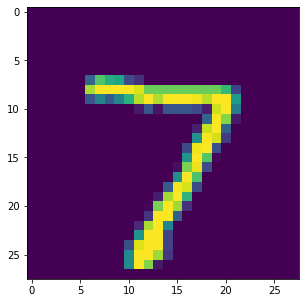

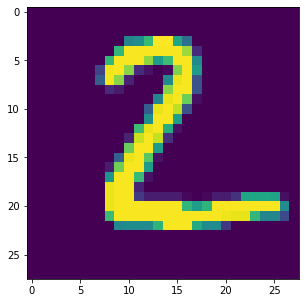

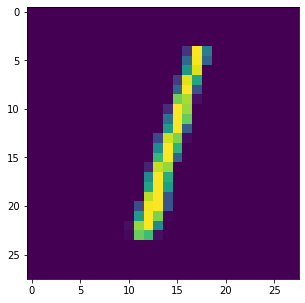

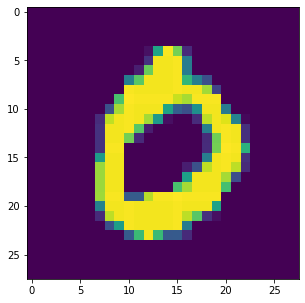

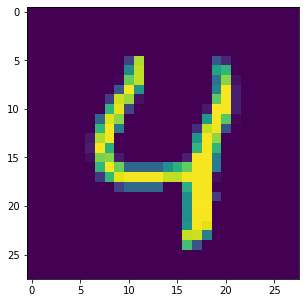

In [39]:
index=14
for i in range(5):
    plt.figure(figsize=(5,5))
    plt.imshow(x_test[i])

In [24]:
# output the prediction number !
predictions_me=predictions.apply(np.argmax,axis=1)
predictions_test=pd.DataFrame(y_test[:5])

predictions=pd.concat([predictions_me,predictions_test],axis=1)
predictions.head()

,0,0
0,0,7
1,0,2
2,0,1
3,0,0
4,0,4
